Problem Description:

In the landscape of digital content, distinguishing between human-generated and AI-generated text is increasingly critical for ensuring authenticity, trustworthiness, and responsible use of automated content creation tools. This project focuses on developing a robust text classification system specifically designed to differentiate between text generated by humans and that generated by AI models. Additionally, the project aims to optimize the classification models for enhanced accuracy and reliability.

Impact:
This project aims to contribute to the development of reliable tools for identifying AI-generated text, promoting transparency and trust in digital content. The outcomes of the project can be valuable for content moderation, journalism, and any context where distinguishing between human and AI-generated language is crucial.

* Train Data: https://www.kaggle.com/datasets/thedrcat/daigt-v2-train-dataset/data
* Test Data: https://www.kaggle.com/competitions/llm-detect-ai-generated-text/data?select=train_essays.csv
* GitHub: 

C:\Users\jmlam\AppData\Local\Temp\ipykernel_67380\1455915169.py:21: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


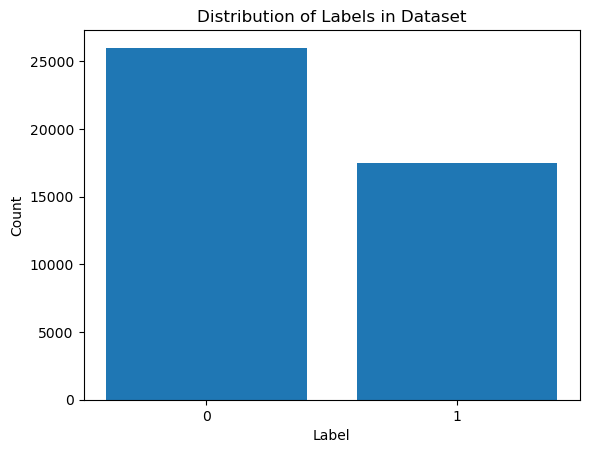

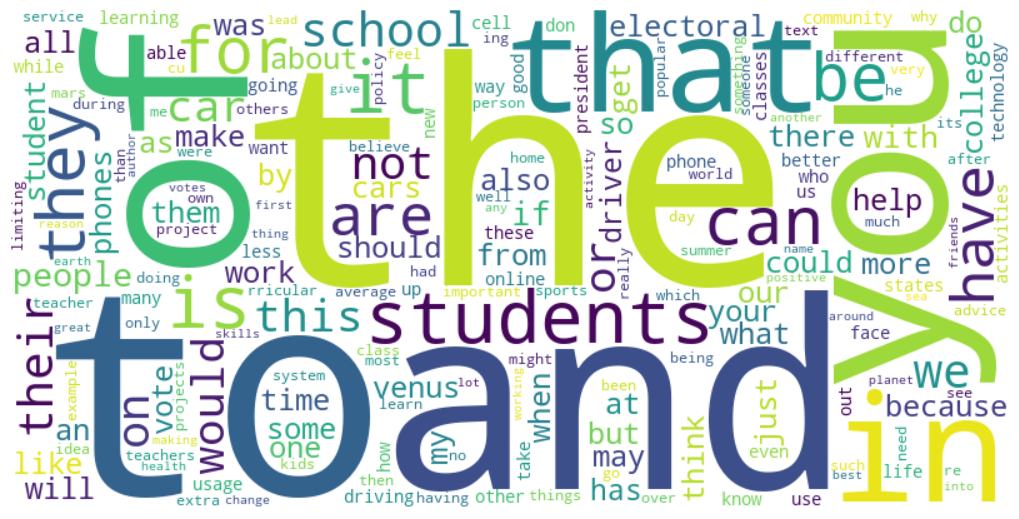

Logistic Regression
Random Forest
Multinomial Naive Bayes
LightGBM
[LightGBM] [Info] Number of positive: 14001, number of negative: 20791
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.659345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 761433
[LightGBM] [Info] Number of data points in the train set: 34792, number of used features: 9353
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402420 -> initscore=-0.395391
[LightGBM] [Info] Start training from score -0.395391
Best model: LGBMClassifier()
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 9334, number of negative: 13860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 9334, number of negative: 13860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.415016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598792
[LightGBM] [Info] Number of data points in the train set: 23194, number of used features: 8198
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402432 -> initscore=-0.395343
[LightGBM] [Info] Start training from score -0.395343
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 9334, number of negative: 13860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.502477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598792
[LightGBM] [Info] Number of data points in the train set: 23194, number of used features: 8198
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402432 -> initscore=-0.395343
[LightGBM] [Info] Start training from score -0.395343
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. 

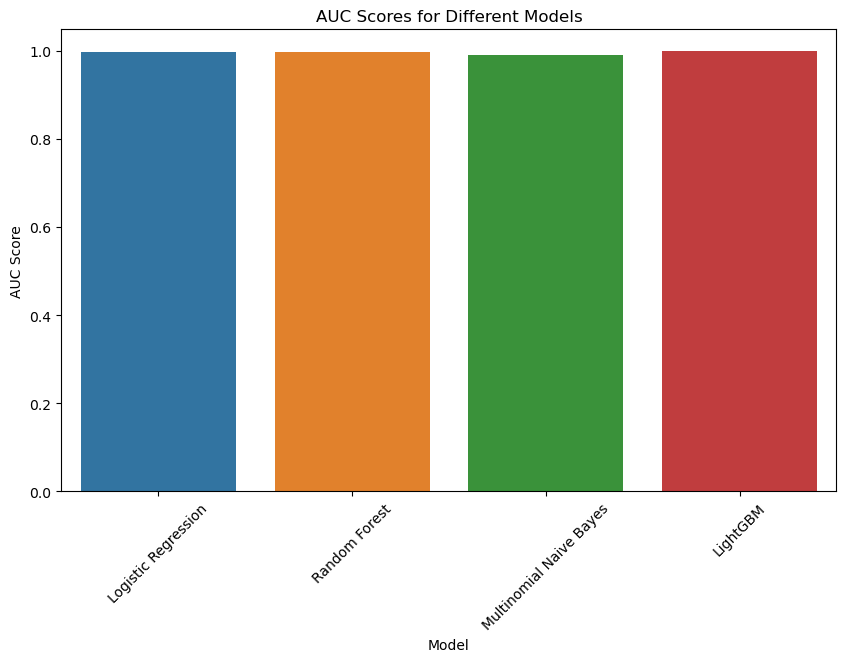

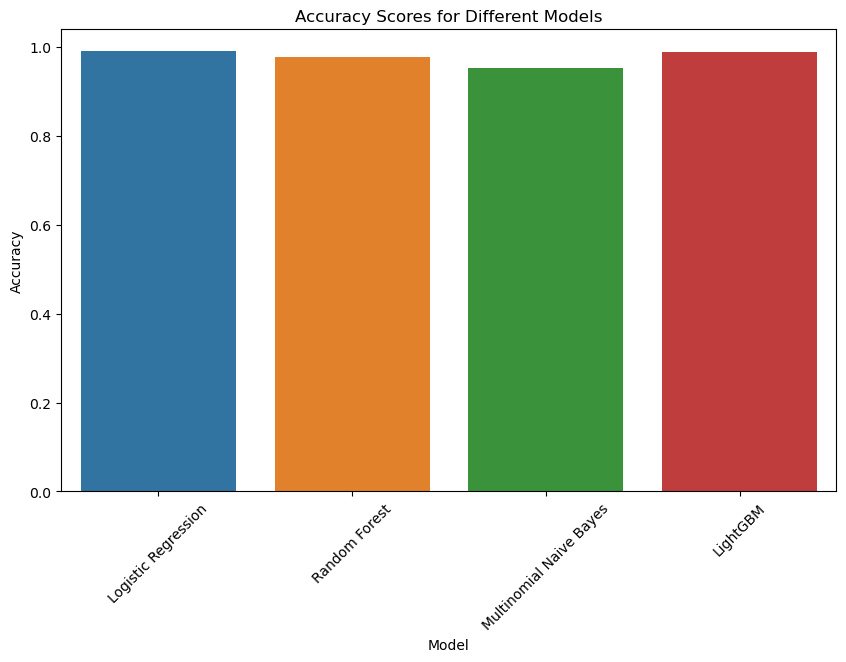

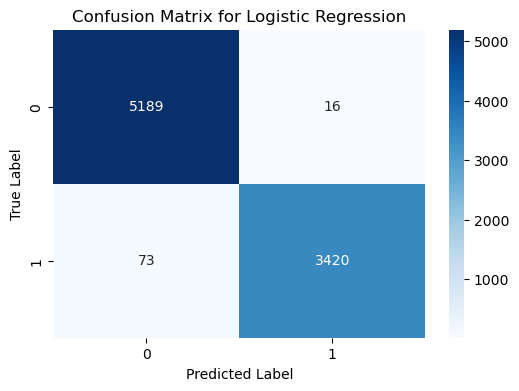

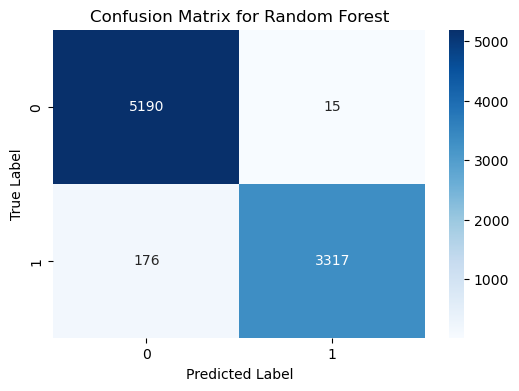

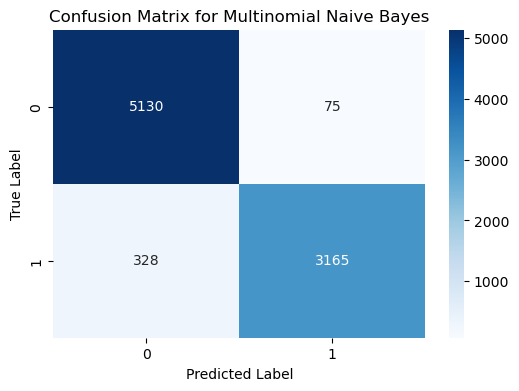

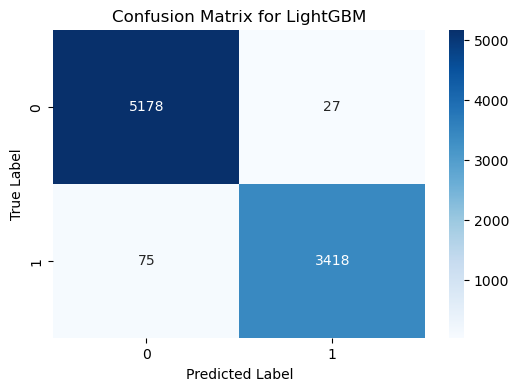

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5205
           1       1.00      0.98      0.99      3493

    accuracy                           0.99      8698
   macro avg       0.99      0.99      0.99      8698
weighted avg       0.99      0.99      0.99      8698

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5205
           1       1.00      0.95      0.97      3493

    accuracy                           0.98      8698
   macro avg       0.98      0.97      0.98      8698
weighted avg       0.98      0.98      0.98      8698

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5205
           1       0.98      0.91      0.94      3493

    accuracy                           0.95

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from bayes_opt import BayesianOptimization
from transformers import BertTokenizer
from wordcloud import WordCloud
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List, Any, Dict
import joblib
from nltk.corpus import stopwords
from pandas_profiling import ProfileReport

class TextClassifier:
    def __init__(self, bert_model='bert-base-uncased'):
        self.tokenizer = BertTokenizer.from_pretrained(bert_model)
        self.tfidf_vectorizer = TfidfVectorizer()
        self.best_model = None
        self.best_model_name = None
        self.optimized_best_model = None
        self.optimized_best_model_params = None

    def load_data(self, train_path, test_path, text_col='text', label_col='label'):
        try:
            train = pd.read_csv(train_path)
            logging.info(f"Data loaded successfully from {train_path}")
            test = pd.read_csv(test_path)
            test["label"] = test["generated"]
            logging.info(f"Data loaded successfully from {test_path}")
            if train.empty or test.empty:
                raise ValueError("One of the files is empty.")
            if text_col not in train.columns or label_col not in train.columns:
                raise ValueError("Required columns are missing.")
            train = train[~train['text'].isin(test['text'])].drop_duplicates(subset=[text_col]).reset_index(drop=True)
            test = test.drop_duplicates(subset=[text_col]).reset_index(drop=True)
            return train, test
        except Exception as e:
            logging.error(f"Error loading data: {e}")
            raise

    def bert_tokenize_to_text(self, df, text_column='text'):
        tokenized_texts = df[text_column].apply(lambda x: ' '.join(self.tokenizer.tokenize(x)))
        return tokenized_texts

    def fit_tfidf(self, train_texts):
        return self.tfidf_vectorizer.fit(train_texts)

    def transform_tfidf(self, texts):
        tfidf_vectors = self.tfidf_vectorizer.transform(texts)
        feature_names = self.tfidf_vectorizer.get_feature_names_out()
        return pd.DataFrame(tfidf_vectors.toarray(), columns=feature_names)

    def profile_data(self, df):
        profile = ProfileReport(df, title="Data Profile", explorative=True)
        profile.to_widgets()

    def plot_label_distribution(self, df, label_col):
        label_counts = df[label_col].value_counts()
        plt.bar(label_counts.index.astype(str), label_counts.values)
        plt.xlabel('Label')
        plt.ylabel('Count')
        plt.title('Distribution of Labels in Dataset')
        plt.show()

    def generate_word_cloud(self, tfidf_matrix):
        """
        Generates a word cloud from the TF-IDF transformed matrix.

        Parameters:
            tfidf_matrix (Any): Sparse matrix from TF-IDF transformation.
        """
        # Sum tfidf frequency of each term throughout the document
        sums = np.array(tfidf_matrix.sum(axis=0)).flatten()

        # Get feature names (vocabulary) from the TF-IDF vectorizer
        feature_names = self.tfidf_vectorizer.get_feature_names_out()

        # Create a dictionary of word frequencies
        tfidf_dict = {word: sums[idx] for word, idx in zip(feature_names, range(len(feature_names)))}

        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white')
        wordcloud.generate_from_frequencies(tfidf_dict)

        # Plot
        plt.figure(figsize=(10, 5), facecolor=None)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()


    def train_and_evaluate_models(self, X_train, X_test, y_train, y_test):
        models = {
            'Logistic Regression': LogisticRegression(),
            'Random Forest': RandomForestClassifier(),
            'Multinomial Naive Bayes': MultinomialNB(),
            'LightGBM': LGBMClassifier(),
        }

        best_auc_score = 0
        best_model = None
        model_results = {}

        for name, model in models.items():
            print(name)
            try:
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(X_test)[:, 1]
                auc_score = roc_auc_score(y_test, y_pred)
                model_results[name] = {
                    'accuracy': accuracy_score(y_test, (y_pred > 0.5)),
                    'classification_report': classification_report(y_test, (y_pred > 0.5)),
                    'confusion_matrix': confusion_matrix(y_test, (y_pred > 0.5)),
                    'roc_auc_score': auc_score
                }
            except AttributeError as e:
                logging.error(f"Error with model {name}: {e}")

            if auc_score > best_auc_score:
                best_auc_score = auc_score
                best_model = model

        logging.info(f'Best model: {type(best_model).__name__} with AUC score: {best_auc_score:.4f}')
        return best_model, model_results

    def perform_grid_search(self, best_model, X_train, y_train):
        model_name = type(best_model).__name__
        param_space = self.get_parameter_space(model_name)

        if not param_space:
            raise ValueError(f"Parameter space not defined for model: {model_name}")

        grid_search = GridSearchCV(estimator=best_model, param_grid=param_space, scoring='roc_auc', cv=3)
        grid_search.fit(X_train, y_train)

        best_model_after_grid_search = grid_search.best_estimator_
        best_params_after_grid_search = grid_search.best_params_

        logging.info(f"Best parameters for {model_name} from grid search: {best_params_after_grid_search}")

        return best_model_after_grid_search, best_params_after_grid_search

    def get_parameter_space(self, model_name):
        param_spaces = {
            'LogisticRegression': {
                'penalty': ['l1', 'l2'],
                'C': [0.001, 0.01],
                'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                'max_iter': [50, 150],
            },
            'RandomForestClassifier': {
                'n_estimators': [100, 200],
                'max_depth': [None, 20],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [2, 4],
                'max_features': ['auto', 'sqrt', 'log2']
            },
            'MultinomialNB': {
                'alpha': [1e-6, 1e-3, 1e-1, 1.0, 10.0],
            },
            'LGBMClassifier': {
                'learning_rate': [0.01, 0.03],
                'n_estimators': [175, 250],
                'max_depth': [50, 100],
            },
        }
        return param_spaces.get(model_name, {})

    def save_model(self, file_path):
        if self.optimized_best_model is not None:
            joblib.dump(self.optimized_best_model, file_path)
        else:
            raise ValueError("There is no optimized model to save.")

    def load_model(self, file_path):
        self.optimized_best_model = joblib.load(file_path)

    def predict_with_model(self, model, test_data):
        try:
            predictions = model.predict(test_data)
            return predictions
        except Exception as e:
            logging.error(f"Error during prediction: {e}")
            raise

    def visualize_results(self, model_results):
        results_df = pd.DataFrame(model_results).T
        plt.figure(figsize=(10, 6))
        sns.barplot(x=results_df.index, y=results_df['roc_auc_score'])
        plt.title('AUC Scores for Different Models')
        plt.xlabel('Model')
        plt.ylabel('AUC Score')
        plt.xticks(rotation=45)
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.barplot(x=results_df.index, y=results_df['accuracy'])
        plt.title('Accuracy Scores for Different Models')
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45)
        plt.show()

        for model_name, confusion_matrix in results_df['confusion_matrix'].items():
            plt.figure(figsize=(6, 4))
            sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix for {model_name}')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

        for model_name, classification_report_str in results_df['classification_report'].items():
            print(f'Classification Report for {model_name}:\n{classification_report_str}')

train_path = "llm-detect-ai-generated-text/daigt_v2/train_v2_drcat_02.csv"
test_path = "llm-detect-ai-generated-text/train_essays.csv"
text_classifier = TextClassifier()
train, test = text_classifier.load_data(train_path, test_path)
X_train, X_test, y_train, y_test = train_test_split(train, train["label"], test_size=0.2, random_state=42)
train_tokens = text_classifier.bert_tokenize_to_text(X_train)
test_tokens = text_classifier.bert_tokenize_to_text(X_test)
text_classifier.fit_tfidf(train_tokens)
train_tfidf_matrix = text_classifier.transform_tfidf(train_tokens)
test_tfidf_matrix = text_classifier.transform_tfidf(test_tokens)
text_classifier.plot_label_distribution(train, 'label')
text_classifier.generate_word_cloud(train_tfidf_matrix)

try:
    best_model, model_results = text_classifier.train_and_evaluate_models(train_tfidf_matrix, test_tfidf_matrix, y_train, y_test)
    print("Best model:", best_model)

    best_model_after_grid_search, best_params = text_classifier.perform_grid_search(best_model, train_tfidf_matrix, y_train)
    print("Best model after grid search:", best_model_after_grid_search)
    print("Best params after grid search:", best_params)
    
    text_classifier.visualize_results(model_results)
except Exception as e:
    print(e)
    
try:
    y_pred = best_model_after_grid_search.predict(test_tfidf_matrix)
    auc = roc_auc_score(y_test.values,y_pred)
    print("AUC Score after grid search:", auc)
except Exception as e:
    print(e)

Conclusion:

In conclusion, the AI-Generated Text Detection project has achieved its primary goal of developing a robust text classification system for distinguishing between human and AI-generated text. The project's outcomes provide a foundation for future research and applications in content moderation, journalism, and other domains where discerning the origin of textual content is paramount. By navigating challenges and embracing ethical considerations, this project contributes to the responsible development and deployment of AI-driven technologies in the realm of textual content analysis.